In [528]:
# Loading in libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from statsmodels.stats.proportion import proportions_ztest

In [529]:
# Importing the data and previewing the first 5 rows
df = pd.read_csv('Team Summaries.csv')

pd.set_option('display.max_columns', None)
df.head()

,season,lg,team,abbreviation,playoffs,age,w,l,pw,pl,mov,sos,srs,o_rtg,d_rtg,n_rtg,pace,f_tr,x3p_ar,ts_percent,e_fg_percent,tov_percent,orb_percent,ft_fga,opp_e_fg_percent,opp_tov_percent,opp_drb_percent,opp_ft_fga,arena,attend,attend_g
0,2024,NBA,Atlanta Hawks,ATL,False,26.2,36.0,46.0,36.0,46.0,-2.18,-0.19,-2.38,117.2,119.4,-2.2,100.1,0.251,0.408,0.576,0.539,11.6,27.1,0.200,0.572,12.4,75.2,0.192,State Farm Arena,696418.0,16986.0
1,2024,NBA,Boston Celtics,BOS,True,28.2,64.0,18.0,66.0,16.0,11.34,-0.60,10.75,123.2,111.6,11.6,97.2,0.224,0.471,0.609,0.578,10.8,24.9,0.180,0.523,10.8,76.3,0.145,TD Garden,766240.0,18689.0
2,2024,NBA,Brooklyn Nets,BRK,False,26.1,32.0,50.0,34.0,48.0,-2.89,-0.13,-3.02,113.2,116.1,-2.9,96.9,0.234,0.412,0.561,0.531,11.8,25.2,0.177,0.543,11.4,76.0,0.193,Barclays Center,720291.0,17568.0
3,2024,NBA,Chicago Bulls,CHI,False,28.1,39.0,43.0,37.0,45.0,-1.44,-0.33,-1.77,114.9,116.3,-1.4,96.3,0.236,0.358,0.568,0.534,11.0,25.1,0.187,0.556,12.7,76.4,0.195,United Center,845620.0,20625.0
4,2024,NBA,Charlotte Hornets,CHO,False,25.1,21.0,61.0,18.0,64.0,-10.24,0.13,-10.12,109.3,119.8,-10.5,97.3,0.212,0.391,0.560,0.529,12.6,21.1,0.167,0.572,12.3,74.5,0.188,Spectrum Center,674400.0,16449.0


In [530]:
# Creating a dataframe containing rows from the 2024 season for each team
teams_24 = df[(df['season'] == 2024) & (df['team'] != 'League Average')]

teams_24.head()

,season,lg,team,abbreviation,playoffs,age,w,l,pw,pl,mov,sos,srs,o_rtg,d_rtg,n_rtg,pace,f_tr,x3p_ar,ts_percent,e_fg_percent,tov_percent,orb_percent,ft_fga,opp_e_fg_percent,opp_tov_percent,opp_drb_percent,opp_ft_fga,arena,attend,attend_g
0,2024,NBA,Atlanta Hawks,ATL,False,26.2,36.0,46.0,36.0,46.0,-2.18,-0.19,-2.38,117.2,119.4,-2.2,100.1,0.251,0.408,0.576,0.539,11.6,27.1,0.200,0.572,12.4,75.2,0.192,State Farm Arena,696418.0,16986.0
1,2024,NBA,Boston Celtics,BOS,True,28.2,64.0,18.0,66.0,16.0,11.34,-0.60,10.75,123.2,111.6,11.6,97.2,0.224,0.471,0.609,0.578,10.8,24.9,0.180,0.523,10.8,76.3,0.145,TD Garden,766240.0,18689.0
2,2024,NBA,Brooklyn Nets,BRK,False,26.1,32.0,50.0,34.0,48.0,-2.89,-0.13,-3.02,113.2,116.1,-2.9,96.9,0.234,0.412,0.561,0.531,11.8,25.2,0.177,0.543,11.4,76.0,0.193,Barclays Center,720291.0,17568.0
3,2024,NBA,Chicago Bulls,CHI,False,28.1,39.0,43.0,37.0,45.0,-1.44,-0.33,-1.77,114.9,116.3,-1.4,96.3,0.236,0.358,0.568,0.534,11.0,25.1,0.187,0.556,12.7,76.4,0.195,United Center,845620.0,20625.0
4,2024,NBA,Charlotte Hornets,CHO,False,25.1,21.0,61.0,18.0,64.0,-10.24,0.13,-10.12,109.3,119.8,-10.5,97.3,0.212,0.391,0.560,0.529,12.6,21.1,0.167,0.572,12.3,74.5,0.188,Spectrum Center,674400.0,16449.0


In [531]:
# Getting a summary of the data

teams_24.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 0 to 29
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   season            30 non-null     int64  
 1   lg                30 non-null     object 
 2   team              30 non-null     object 
 3   abbreviation      30 non-null     object 
 4   playoffs          30 non-null     bool   
 5   age               30 non-null     float64
 6   w                 30 non-null     float64
 7   l                 30 non-null     float64
 8   pw                30 non-null     float64
 9   pl                30 non-null     float64
 10  mov               30 non-null     float64
 11  sos               30 non-null     float64
 12  srs               30 non-null     float64
 13  o_rtg             30 non-null     float64
 14  d_rtg             30 non-null     float64
 15  n_rtg             30 non-null     float64
 16  pace              30 non-null     float64
 17  f_tr

In [532]:
# Descriptive statistics for the data

teams_24.describe().round(2)

,season,age,w,l,pw,pl,mov,sos,srs,o_rtg,d_rtg,n_rtg,pace,f_tr,x3p_ar,ts_percent,e_fg_percent,tov_percent,orb_percent,ft_fga,opp_e_fg_percent,opp_tov_percent,opp_drb_percent,opp_ft_fga,attend,attend_g
count,30.0,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00
mean,2024.0,26.37,41.00,41.00,41.17,40.83,-0.00,0.00,0.00,115.28,115.26,0.03,98.51,0.24,0.39,0.58,0.55,12.15,24.22,0.19,0.55,12.14,75.76,0.19,749433.83,18284.67
std,0.0,1.95,13.41,13.41,12.97,12.97,5.56,0.38,5.38,3.88,2.87,5.62,1.80,0.02,0.03,0.02,0.02,0.88,2.31,0.02,0.01,0.83,1.42,0.02,49675.64,1188.75
min,2024.0,23.00,14.00,18.00,18.00,16.00,-10.24,-0.66,-10.12,107.20,109.00,-10.50,95.20,0.21,0.35,0.54,0.50,10.70,19.90,0.17,0.52,10.60,72.50,0.14,674400.00,16449.00
25%,2024.0,25.10,31.25,33.00,30.25,33.00,-4.39,-0.22,-3.92,113.25,113.10,-4.40,97.20,0.23,0.37,0.57,0.53,11.50,22.98,0.18,0.54,11.55,74.80,0.18,716643.00,17478.75
50%,2024.0,26.20,46.50,35.50,46.00,36.00,1.89,-0.00,1.73,115.75,115.25,1.95,98.25,0.24,0.39,0.58,0.54,11.95,24.40,0.19,0.54,12.20,76.00,0.19,740737.00,18111.50
75%,2024.0,28.00,49.00,50.75,49.00,51.75,3.06,0.13,3.00,117.75,117.22,3.08,99.80,0.26,0.41,0.59,0.56,12.90,25.18,0.21,0.56,12.70,76.78,0.20,793750.50,19310.50
max,2024.0,30.40,64.00,68.00,66.00,64.00,11.34,0.74,10.75,123.20,120.40,11.60,102.70,0.29,0.47,0.61,0.58,13.60,29.40,0.22,0.57,13.80,78.40,0.23,845620.00,20625.00


In [533]:
# Dropping unneeded columns
teams_24 = teams_24.drop(columns = ['arena', 'attend'])

teams_24.head(10)

,season,lg,team,abbreviation,playoffs,age,w,l,pw,pl,mov,sos,srs,o_rtg,d_rtg,n_rtg,pace,f_tr,x3p_ar,ts_percent,e_fg_percent,tov_percent,orb_percent,ft_fga,opp_e_fg_percent,opp_tov_percent,opp_drb_percent,opp_ft_fga,attend_g
0,2024,NBA,Atlanta Hawks,ATL,False,26.2,36.0,46.0,36.0,46.0,-2.18,-0.19,-2.38,117.2,119.4,-2.2,100.1,0.251,0.408,0.576,0.539,11.6,27.1,0.200,0.572,12.4,75.2,0.192,16986.0
1,2024,NBA,Boston Celtics,BOS,True,28.2,64.0,18.0,66.0,16.0,11.34,-0.60,10.75,123.2,111.6,11.6,97.2,0.224,0.471,0.609,0.578,10.8,24.9,0.180,0.523,10.8,76.3,0.145,18689.0
2,2024,NBA,Brooklyn Nets,BRK,False,26.1,32.0,50.0,34.0,48.0,-2.89,-0.13,-3.02,113.2,116.1,-2.9,96.9,0.234,0.412,0.561,0.531,11.8,25.2,0.177,0.543,11.4,76.0,0.193,17568.0
3,2024,NBA,Chicago Bulls,CHI,False,28.1,39.0,43.0,37.0,45.0,-1.44,-0.33,-1.77,114.9,116.3,-1.4,96.3,0.236,0.358,0.568,0.534,11.0,25.1,0.187,0.556,12.7,76.4,0.195,20625.0
4,2024,NBA,Charlotte Hornets,CHO,False,25.1,21.0,61.0,18.0,64.0,-10.24,0.13,-10.12,109.3,119.8,-10.5,97.3,0.212,0.391,0.560,0.529,12.6,21.1,0.167,0.572,12.3,74.5,0.188,16449.0
5,2024,NBA,Cleveland Cavaliers,CLE,False,26.2,48.0,34.0,47.0,35.0,2.41,-0.44,1.98,115.2,112.7,2.5,97.2,0.234,0.422,0.586,0.557,12.4,23.2,0.179,0.535,12.3,76.9,0.190,19432.0
6,2024,NBA,Dallas Mavericks,DAL,True,26.5,50.0,32.0,46.0,36.0,2.21,0.09,2.30,117.6,115.4,2.2,100.1,0.251,0.441,0.592,0.562,11.2,22.2,0.190,0.548,12.1,75.2,0.184,20217.0
7,2024,NBA,Denver Nuggets,DEN,True,27.1,57.0,25.0,54.0,28.0,5.26,-0.03,5.23,118.5,113.0,5.5,96.8,0.224,0.352,0.589,0.562,11.5,25.5,0.170,0.526,11.2,75.6,0.195,19684.0
8,2024,NBA,Detroit Pistons,DET,False,23.8,14.0,68.0,20.0,62.0,-9.11,0.05,-9.06,109.7,118.8,-9.1,99.8,0.246,0.360,0.562,0.526,13.5,23.9,0.193,0.558,11.1,77.3,0.221,18159.0
9,2024,NBA,Golden State Warriors,GSW,False,28.4,46.0,36.0,47.0,35.0,2.61,0.16,2.77,117.8,115.2,2.6,99.2,0.219,0.425,0.586,0.557,12.5,27.5,0.171,0.539,11.5,76.1,0.195,18064.0


In [534]:
# Fixing incorrect values for the 'playoff' column 
team_list = ['CLE', 'IND', 'LAL', 'MIA', 'NOP', 'NYK', 'ORL', 'PHO', 'PHI']

teams_24.loc[teams_24['abbreviation'].isin(team_list), 'playoffs'] = True

teams_24['playoffs'].value_counts()

playoffs
True     16
False    14
Name: count, dtype: int64

In [535]:
# Changing the 'playoff' column to be numerical for future use
teams_24['playoffs'] = teams_24['playoffs'].astype(int)

teams_24[teams_24['season'] == 2024]['playoffs'].sum()

16

In [536]:
# Adjusting the value of the 'e_fg_percent' column to make it more consistent with the other columns I plan to use
teams_24['e_fg_percent'] = teams_24['e_fg_percent'] * 100

teams_24.head()

,season,lg,team,abbreviation,playoffs,age,w,l,pw,pl,mov,sos,srs,o_rtg,d_rtg,n_rtg,pace,f_tr,x3p_ar,ts_percent,e_fg_percent,tov_percent,orb_percent,ft_fga,opp_e_fg_percent,opp_tov_percent,opp_drb_percent,opp_ft_fga,attend_g
0,2024,NBA,Atlanta Hawks,ATL,0,26.2,36.0,46.0,36.0,46.0,-2.18,-0.19,-2.38,117.2,119.4,-2.2,100.1,0.251,0.408,0.576,53.9,11.6,27.1,0.200,0.572,12.4,75.2,0.192,16986.0
1,2024,NBA,Boston Celtics,BOS,1,28.2,64.0,18.0,66.0,16.0,11.34,-0.60,10.75,123.2,111.6,11.6,97.2,0.224,0.471,0.609,57.8,10.8,24.9,0.180,0.523,10.8,76.3,0.145,18689.0
2,2024,NBA,Brooklyn Nets,BRK,0,26.1,32.0,50.0,34.0,48.0,-2.89,-0.13,-3.02,113.2,116.1,-2.9,96.9,0.234,0.412,0.561,53.1,11.8,25.2,0.177,0.543,11.4,76.0,0.193,17568.0
3,2024,NBA,Chicago Bulls,CHI,0,28.1,39.0,43.0,37.0,45.0,-1.44,-0.33,-1.77,114.9,116.3,-1.4,96.3,0.236,0.358,0.568,53.4,11.0,25.1,0.187,0.556,12.7,76.4,0.195,20625.0
4,2024,NBA,Charlotte Hornets,CHO,0,25.1,21.0,61.0,18.0,64.0,-10.24,0.13,-10.12,109.3,119.8,-10.5,97.3,0.212,0.391,0.560,52.9,12.6,21.1,0.167,0.572,12.3,74.5,0.188,16449.0


/tmp/ipykernel_156/2156965967.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = teams_24_sorted, x = 'abbreviation', y = 'w', palette = 'coolwarm_r')


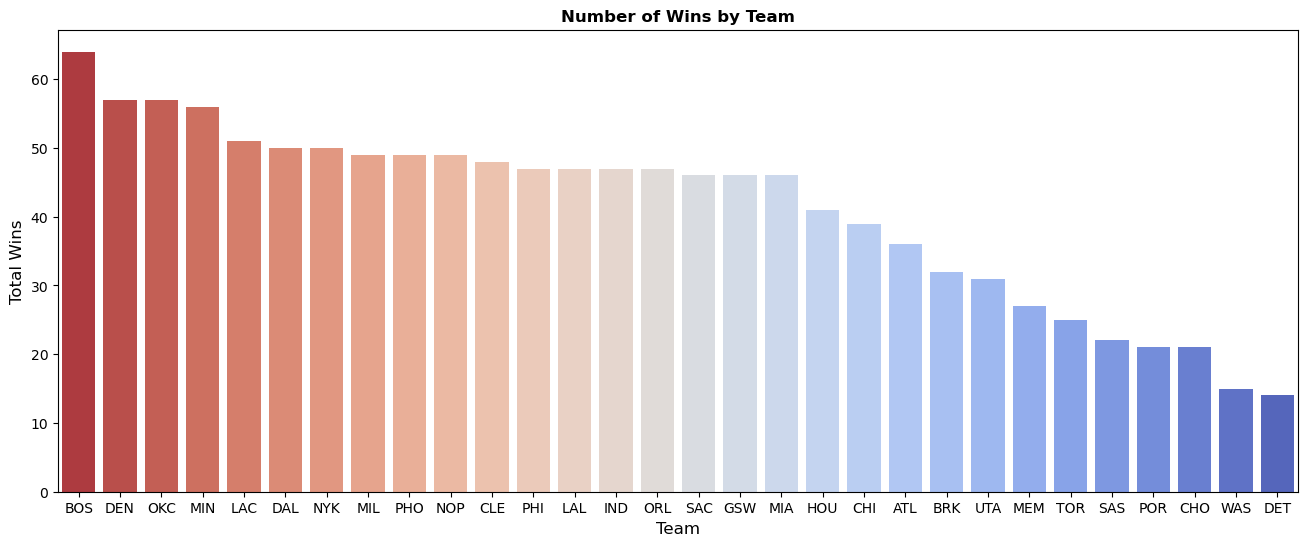

In [537]:
# Observing total wins for each team using a bar chart
teams_24_sorted = teams_24.sort_values('w', ascending = False)
plt.figure(figsize = (16,6))
sns.barplot(data = teams_24_sorted, x = 'abbreviation', y = 'w', palette = 'coolwarm_r')
plt.title('Number of Wins by Team', fontsize = 12, weight = 'bold')
plt.xlabel('Team', fontsize = 12)
plt.ylabel('Total Wins', fontsize = 12)
plt.show()

/tmp/ipykernel_156/2205214295.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = teams_24_sorted, x = 'abbreviation', y = 'e_fg_percent', palette = 'coolwarm_r')


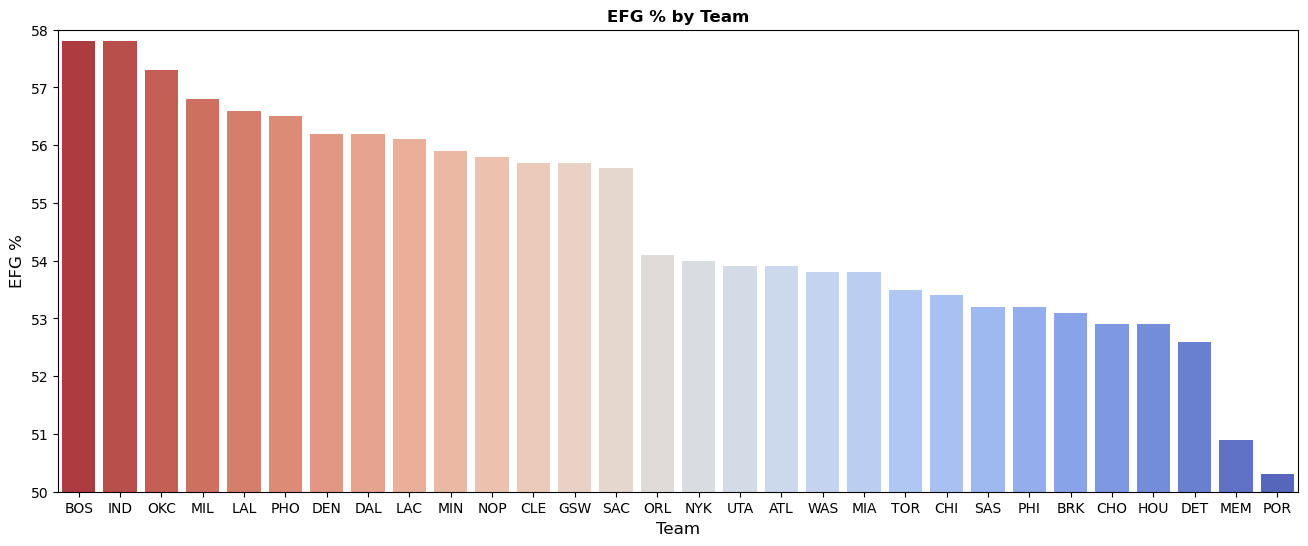

In [538]:
# Observing effective field goal % for each team using a bar chart
teams_24_sorted = teams_24.sort_values('e_fg_percent', ascending = False)
plt.figure(figsize = (16,6))
sns.barplot(data = teams_24_sorted, x = 'abbreviation', y = 'e_fg_percent', palette = 'coolwarm_r')
plt.ylim(50, 58)
plt.title('EFG % by Team', fontsize = 12, weight = 'bold')
plt.xlabel('Team', fontsize = 12)
plt.ylabel('EFG %', fontsize = 12)
plt.show()

/tmp/ipykernel_156/497285695.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = teams_24_sorted, x = 'abbreviation', y = 'tov_percent', palette = 'coolwarm_r')


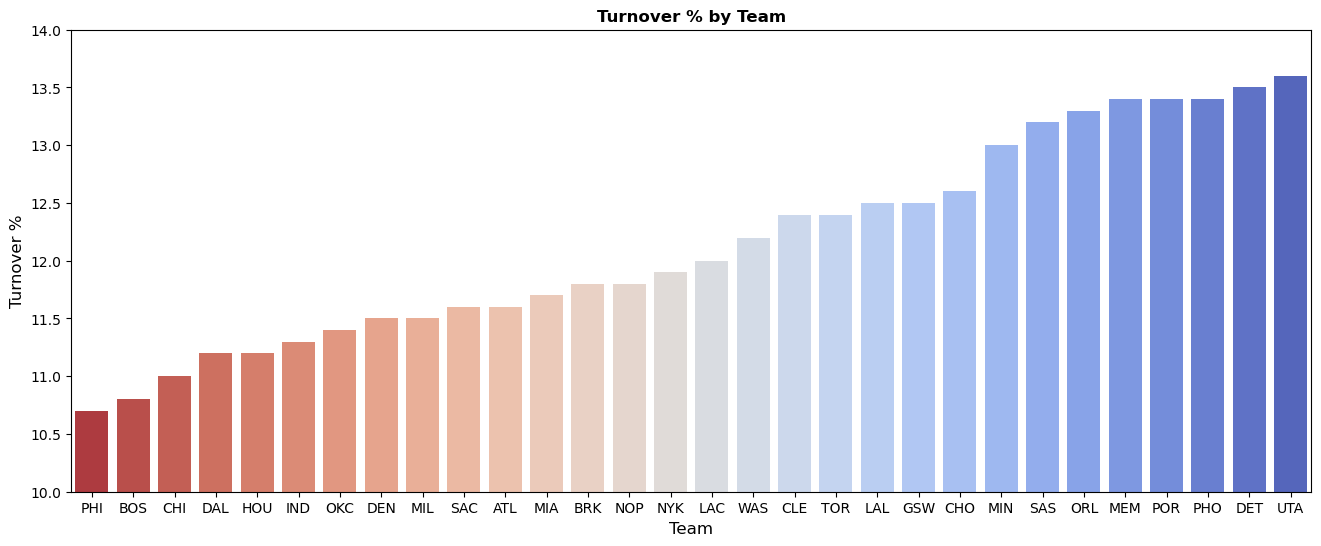

In [539]:
# Observing turnover % for each team using a bar chart
teams_24_sorted = teams_24.sort_values('tov_percent', ascending = True)
plt.figure(figsize = (16,6))
sns.barplot(data = teams_24_sorted, x = 'abbreviation', y = 'tov_percent', palette = 'coolwarm_r')
plt.ylim(10, 14)
plt.title('Turnover % by Team', fontsize = 12, weight = 'bold')
plt.xlabel('Team', fontsize = 12)
plt.ylabel('Turnover %', fontsize = 12)
plt.show()

/tmp/ipykernel_156/4043298504.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = teams_24_sorted, x = 'abbreviation', y = 'orb_percent', palette = 'coolwarm_r')


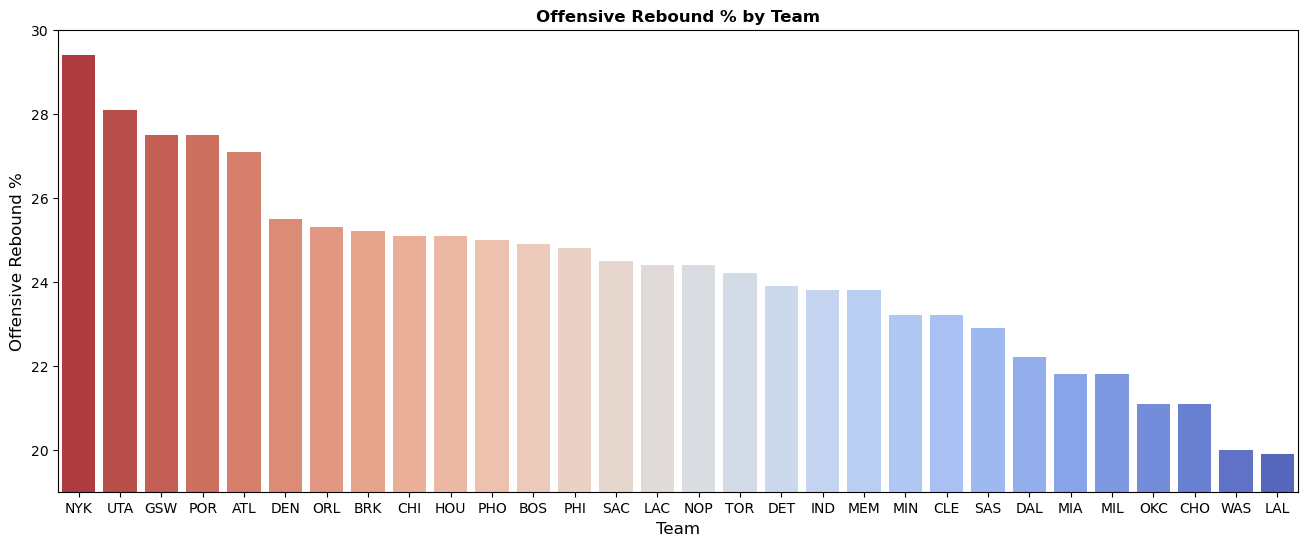

In [540]:
# Observing offensive rebound % for each team using a bar chart
teams_24_sorted = teams_24.sort_values('orb_percent', ascending = False)
plt.figure(figsize = (16,6))
sns.barplot(data = teams_24_sorted, x = 'abbreviation', y = 'orb_percent', palette = 'coolwarm_r')
plt.ylim(19, 30)
plt.title('Offensive Rebound % by Team', fontsize = 12, weight = 'bold')
plt.xlabel('Team', fontsize = 12)
plt.ylabel('Offensive Rebound %', fontsize = 12)
plt.show()

/tmp/ipykernel_156/326548904.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = teams_24_sorted, x = 'abbreviation', y = 'ft_fga', palette = 'coolwarm_r')


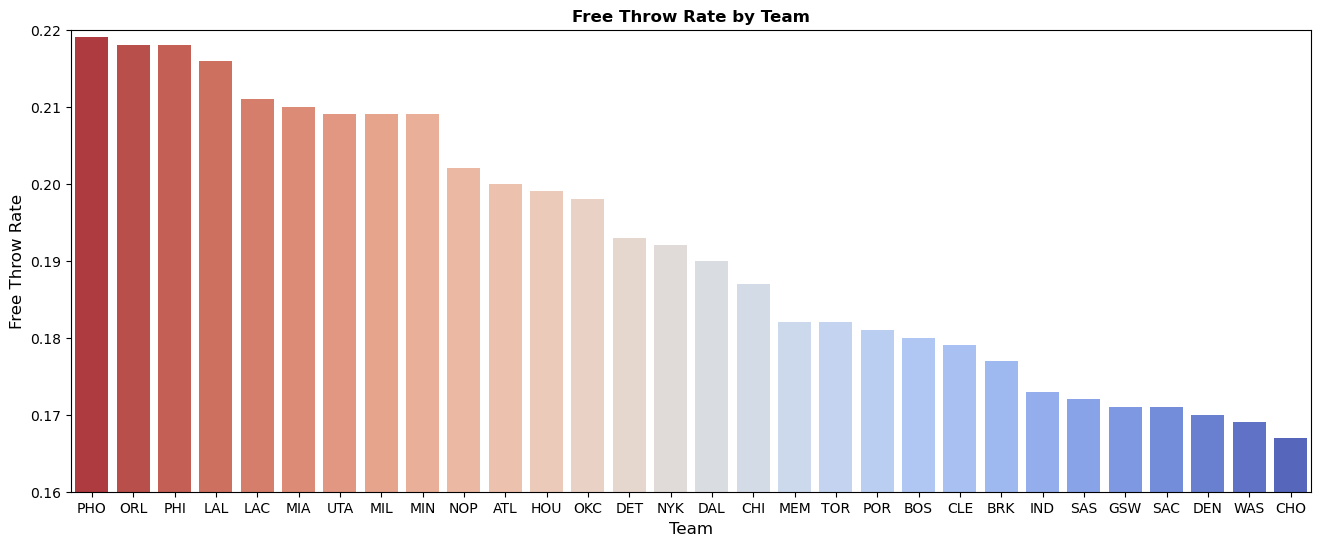

In [541]:
# Observing free throw rate for each team using a bar chart
teams_24_sorted = teams_24.sort_values('ft_fga', ascending = False)
plt.figure(figsize = (16,6))
sns.barplot(data = teams_24_sorted, x = 'abbreviation', y = 'ft_fga', palette = 'coolwarm_r')
plt.ylim(.16, .22)
plt.title('Free Throw Rate by Team', fontsize = 12, weight = 'bold')
plt.xlabel('Team', fontsize = 12)
plt.ylabel('Free Throw Rate', fontsize = 12)
plt.show()

# Creating a Linear Regression Model

Objective: 
- To determine if the "Four Factors" (effective field goal percentage, turnover percentage, offensive rebound percentage, and free throws made per field goal attempt) are significant predictors of the number of wins for a basketball team


Null hypothesis: 
- The "Four Factors" are not significant predictors in the number of wins for a team

Alternative hypothesis: 
- At least one of the "Four Factors" is a significant predictor of the number of wins for a team

Significance level: 
- $\alpha$ = .05

In [543]:
# Creating a linear regression model using the "Four Factors" as the independent variables

# Selecting the independent variables
X = teams_24[['e_fg_percent', 'tov_percent', 'orb_percent', 'ft_fga']]

# Scaling the independent variables
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

# Creating a dataframe with the scaled variables
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)

# Concatenating the scaled independent variables with the dependent variable 'w'
teams_scaled = pd.concat([teams_24['w'], X_scaled_df], axis = 'columns')

# Defining the OLS model using the formula and displaying the summary
lm = sm.OLS.from_formula('w ~ e_fg_percent + tov_percent + orb_percent + ft_fga', data = teams_scaled)

result = lm.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      w   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     23.00
Date:                Thu, 30 May 2024   Prob (F-statistic):           4.53e-08
Time:                        22:16:40   Log-Likelihood:                -96.792
No. Observations:                  30   AIC:                             203.6
Df Residuals:                      25   BIC:                             210.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       41.0000      1.219     33.634      0.000      38.489      43.511
e_fg_percent     8.9978      1.393      6.461      0.000       6.130      11.866
tov_percent     -3.7710      1.344     -2.805      0.010      -6.540      -1.002
orb_percent      3.3553      1.259      2.664      0.013       0.762       5.949
ft_fga           3.6252      1.245      2.911      0.007       1.060       6.190
==============================================================================
Omnibus:                        0.334   Durbin-Watson:                   1.719
Prob(Omnibus):                  0.846   Jarque-Bera (JB):                0.506
Skew:                          -0.111   Prob(JB):                        0.777
Kurtosis:                       2.404   Cond. No.                         1.71
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Results

Explained Variation: 
- About 78.6% of the variation in 'wins' can be explained by the "Four Factors"

F-statistic: 
- The p-value associated with the F-statistic is extremely low, indicating that the overall model is highly significant

Coefficients: 
- Effective Field Goal Percentage was the factor that had the largest coefficient, with an increase of approximately 9 wins for every 1 standard deviation increase in EFG%

P-values: 
- All independent variables had p-values that were significant at the 5% level

# Statement

There is enough evidence at the 5% significance level to reject the null hypothesis stating that the "Four Factors" are not significant predictors of the number of wins for a team



# Creating a Logistic Regression Model

Objective: 
- To determine whether the "Four Factors" stats from the 2023-2024 season can prove to be an accurate predictor of whether or not a team made the playoffs

Null Hypothesis: 
- The "Four Factors" stats from the 2023-2024 season are not an accurate predictor of whether or not a team made the playoffs

Alternative Hypothesis: 
- The "Four Factors" stats from the 2023-2024 season are an accurate predictor of whether or not a team made the playoffs

Significance level: 
- $\alpha$ = .05

In [546]:
# Creating a logistic regression model to predict whether a team made the playoffs or not using the "Four Factors"

# Selecting the independent variables
X = teams_24[['e_fg_percent', 'tov_percent', 'orb_percent', 'ft_fga']]
y = teams_24['playoffs']

# Scaling the independent variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = .25, random_state = 5)

# Initializing the model and fitting it to the training data
lgr = LogisticRegression()
lgr.fit(X_train, y_train)

# Making predictions and evaluating the model
y_pred = lgr.predict(X_test)
pred_proba = lgr.predict_proba(X_test)
print(f'Predictions: {y_pred}')
print(f'\nPrediction Probabilities: \n{np.round(pred_proba, 2)}\n')

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy Score: {round(accuracy, 2)}')

conf_mat = confusion_matrix(y_test, y_pred)
print(f'\nConfusion Matrix: \n{conf_mat}')

class_report = classification_report(y_test, y_pred)
print(f'\nClassification Report: \n{class_report}')

Predictions: [1 0 1 1 1 1 0 1]

Prediction Probabilities: 
[[0.08 0.92]
 [0.67 0.33]
 [0.09 0.91]
 [0.41 0.59]
 [0.11 0.89]
 [0.48 0.52]
 [0.8  0.2 ]
 [0.03 0.97]]

Accuracy Score: 0.75

Confusion Matrix: 
[[2 2]
 [0 4]]

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       0.67      1.00      0.80         4

    accuracy                           0.75         8
   macro avg       0.83      0.75      0.73         8
weighted avg       0.83      0.75      0.73         8



In [547]:
# Creating a new dataframe that contains the team stats from the 2023 season in order to test the model on new data
ff_23 = df[(df['season'] == 2023) & (df['team'] != 'League Average')]

ff_23 = ff_23[['abbreviation', 'playoffs', 'e_fg_percent', 'tov_percent', 'orb_percent', 'ft_fga']]

team_list_23 = ['MIL', 'MIA', 'CLE', 'NYK', 'PHI', 'BRK', 'BOS', 'ATL', 'DEN', 'MIN', 'PHO', 'LAC', 'SAC', 'GSW', 'MEM', 'LAL']

ff_23.loc[ff_23['abbreviation'].isin(team_list_23), 'playoffs'] = True

ff_23['playoffs'] = ff_23['playoffs'].astype('int')

ff_23['e_fg_percent'] = ff_23['e_fg_percent'] * 100

ff_23.head()

,abbreviation,playoffs,e_fg_percent,tov_percent,orb_percent,ft_fga
31,ATL,1,54.1,11.2,25.1,0.200
32,BOS,1,56.6,12.0,22.1,0.197
33,BRK,1,56.2,12.7,19.6,0.208
34,CHI,0,55.0,12.2,20.1,0.203
35,CHO,0,51.6,12.3,23.8,0.195


In [548]:
# Constructing new data using the stats from the 2023 season and storing the actual outcomes
new_data = ff_23.iloc[:,2:]
actual_outcomes = np.array(ff_23.iloc[:,1])

# Scaling the new data
new_data_scaled = scaler.transform(new_data)

# Making predictions on the new data and comparing vs. the actual outcomes
new_pred = lgr.predict(new_data_scaled)
new_pred_proba = lgr.predict_proba(new_data_scaled)

print(f'New Predictions: {new_pred}')
print(f'Actual Outcomes: {actual_outcomes}')
print(f'\nAccuracy Score: {np.round(np.sum(actual_outcomes) / np.sum(new_pred), 2)}')
print(f'\nNew Prediction Probabilities: \n{np.round(new_pred_proba, 2)}\n')

# Displaying the coefficients for the independent variables
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': np.round(lgr.coef_[0], 2)
})
print(coefficients)

New Predictions: [1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1]
Actual Outcomes: [1 1 1 0 0 1 0 1 0 1 0 0 1 1 1 1 1 1 0 1 0 0 1 1 0 1 0 0 0 0]

Accuracy Score: 0.7

New Prediction Probabilities: 
[[0.27 0.73]
 [0.07 0.93]
 [0.05 0.95]
 [0.12 0.88]
 [0.83 0.17]
 [0.13 0.87]
 [0.01 0.99]
 [0.14 0.86]
 [0.6  0.4 ]
 [0.44 0.56]
 [0.93 0.07]
 [0.29 0.71]
 [0.12 0.88]
 [0.08 0.92]
 [0.54 0.46]
 [0.25 0.75]
 [0.45 0.55]
 [0.16 0.84]
 [0.23 0.77]
 [0.22 0.78]
 [0.33 0.67]
 [0.36 0.64]
 [0.01 0.99]
 [0.66 0.34]
 [0.08 0.92]
 [0.01 0.99]
 [0.95 0.05]
 [0.63 0.37]
 [0.43 0.57]
 [0.23 0.77]]

        Feature  Coefficient
0  e_fg_percent         1.38
1   tov_percent        -0.56
2   orb_percent        -0.36
3        ft_fga         0.91


In [549]:
# Calculate counts/totals for the baseline and the model
baseline_count = np.sum(actual_outcomes)  # Number of correct predictions under baseline (16)
baseline_total = len(actual_outcomes)  # Total number of predictions made by the baseline model (30)

model_count = np.sum(new_pred == actual_outcomes)  # Number of correct predictions under logistic regression model (19)
model_total = len(new_pred)  # Total number of predictions made by the logistic regression model on new data (30)

# Performing z-test
counts = np.array([model_count, baseline_count])
nobs = np.array([model_total, baseline_total])
stat, pval = proportions_ztest(counts, nobs, alternative = 'larger') 

# Comparing the p-value to the significance level (.05)
if pval < 0.05:
    print(f'p-value = {round(pval, 3)}\nThe difference in accuracies is statistically significant.')
else:
    print(f'p-value = {round(pval, 3)}\nThere is no significant difference in accuracies.')

p-value = 0.216
There is no significant difference in accuracies.


# Results

Initial Insights: 
- The variable 'orb_percent' had a negative correlation with playoff odds, which was unexpected
- The model seemed to over-predict new data for making the playoffs

Accuracy Scores: 
- The accuracy score for the model on the new data from the 2023 season was .70
- The accuracy score for the baseline model was .53
                                   
Z-test: 
- After running the z-test for proportions, it was found that the difference between accuracy scores was not statistically significant,
  with a p-value of .216
- The p-value (.216) is greater than the level of significance (.05)

# Statement 

There is not enough evidence at the 5% significance level to reject the null hypothesis stating that the "Four Factors" stats from the 2023-2024 season are not an accurate predictor of whether or not a team made the playoffs